In [1]:
import pandas as pd
import regex as re

In [2]:
df=pd.read_excel('Rawdata.xlsx')

In [3]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [4]:
df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [5]:
df.shape

(6, 6)

In [ ]:
df.isnull()

df['Name'] = df['Name'].str.replace(r'\W','')

#df['age'] = df['age'].str.extract('(\d+)')

In [7]:
df['Name']=df['Name'].str.replace(r'\W','')

C:\Users\pavan\AppData\Local\Temp\ipykernel_9920\2336627936.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name']=df['Name'].str.replace(r'\W','')


In [8]:
df['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [9]:
df['Domain']=df['Domain'].str.replace(r'\W','')

C:\Users\pavan\AppData\Local\Temp\ipykernel_9920\1578638787.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Domain']=df['Domain'].str.replace(r'\W','')


In [10]:
df['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [11]:
df['Age'] = df['Age'].str.replace(r'\W','')

C:\Users\pavan\AppData\Local\Temp\ipykernel_9920\1158411644.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Age'] = df['Age'].str.replace(r'\W','')


 df['Age']

In [12]:
df['Age'] = df['Age'].str.extract('(\d+)')
df['age'] = df['age'].str.extract('(\d+)')

In [13]:
df['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [14]:
df['Age'].fillna(20, inplace=True)
df['Age']

0    34
1    45
2    20
3    20
4    67
5    55
Name: Age, dtype: object

In [15]:
df['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [16]:
df['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [17]:
df['Salary']=df['Salary'].str.extract('(\d+)')

In [18]:
df['Salary']

0        5
1       10
2        1
3     2000
4    30000
5     6000
Name: Salary, dtype: object

In [19]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5,2+
1,Teddy,Testing,45,Bangalore,10,<3
2,Umar,Dataanalyst,20,NaN,1,4> yrs
3,Jane,Analytics,20,Hyderbad,2000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,6000,10+


In [63]:
df['Exp'] = df['Exp'].str.extract('(\d+)')

In [64]:
df['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [73]:
df['Exp'].astype('float64')

0     2.0
1     3.0
2     4.0
3     4.8
4     5.0
5    10.0
Name: Exp, dtype: float64

In [72]:
df['Exp'].fillna((df['Exp'].astype('float32')).mean(), inplace=True)

In [21]:
df['Exp']=df['Exp'].str.extract('(\d+)')

In [22]:
df['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [23]:
clean_data=df.copy()

In [24]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5,2
1,Teddy,Testing,45,Bangalore,10,3
2,Umar,Dataanalyst,20,NaN,1,4
3,Jane,Analytics,20,Hyderbad,2000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,6000,10


In [25]:
import numpy as np
import pandas as pd

In [60]:
print(clean_data['Age'].mean())
print(pd.to_numeric(clean_data['Age']).mean())
print(np.mean(clean_data['Age']))

40.166666666666664
40.166666666666664
40.166666666666664


In [78]:
#two ways of using mean
pd.to_numeric(df['Age']).mean()
np.mean(df['Age'].astype('int32'))

40.166666666666664

In [59]:
np.mean((clean_data['Age']))

40.166666666666664

In [27]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [28]:
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [29]:
clean_data['Location'].isnull().sum()

2

In [79]:
clean_data['Location'].mode()

0    Bangalore
Name: Location, dtype: category
Categories (4, object): ['Bangalore', 'Delhi', 'Hyderbad', 'Mumbai']

In [30]:
clean_data['Location']=clean_data['Location'].fillna(clean_data['Location'].mode()[0])

In [62]:
clean_data.shape

(6, 6)

In [32]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [33]:
clean_data['Age'] = clean_data['Age'].astype(int)

In [34]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: int32(1), object(5)
memory usage: 392.0+ bytes


In [35]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [36]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      object  
 5   Exp       6 non-null      object  
dtypes: category(3), int32(1), object(2)
memory usage: 910.0+ bytes


In [37]:
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
clean_data['Salary']

0        5
1       10
2        1
3     2000
4    30000
5     6000
Name: Salary, dtype: object

C:\Users\pavan\AppData\Local\Temp\ipykernel_9920\3249851952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

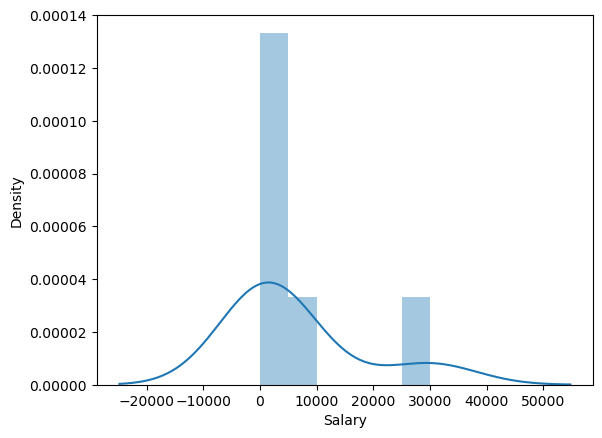

In [82]:
sns.distplot(df['Salary'])

C:\Users\pavan\AppData\Local\Temp\ipykernel_9920\3692155897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis1 = sns.distplot(clean_data['Salary'])


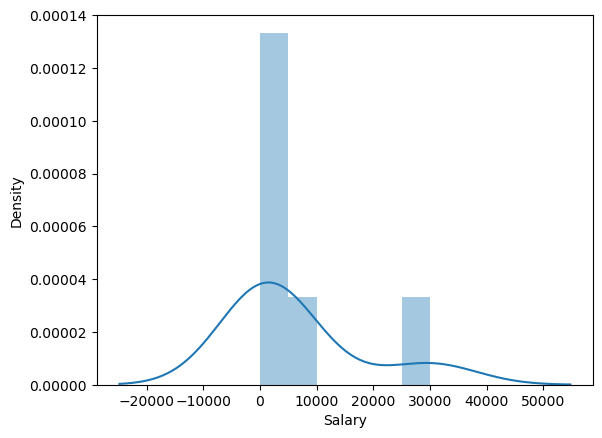

In [39]:
vis1 = sns.distplot(clean_data['Salary'])

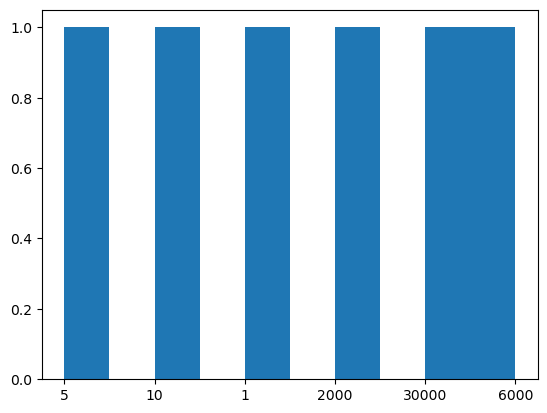

In [40]:
vis2 = plt.hist(clean_data['Salary'])


In [41]:
clean_data['Exp']=clean_data['Exp'].astype('int32')
clean_data['Salary']=clean_data['Salary'].astype('int32')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 862.0 bytes


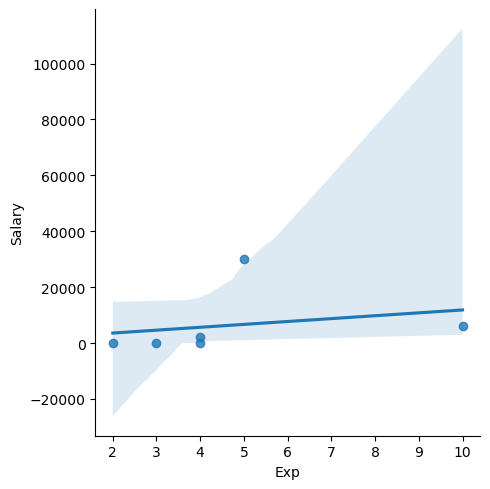

In [42]:
vis4 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary')

In [43]:
clean_data


,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5,2
1,Teddy,Testing,45,Bangalore,10,3
2,Umar,Dataanalyst,20,Bangalore,1,4
3,Jane,Analytics,20,Hyderbad,2000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,6000,10


In [44]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 862.0 bytes


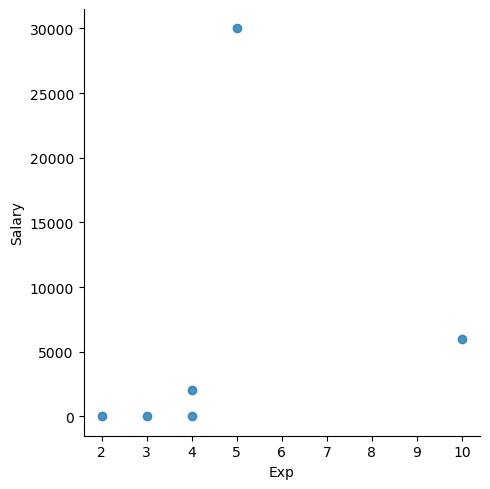

In [45]:
vis5 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary', fit_reg = False)

In [46]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5,2
1,Teddy,Testing,45,Bangalore,10,3
2,Umar,Dataanalyst,20,Bangalore,1,4
3,Jane,Analytics,20,Hyderbad,2000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,6000,10


In [47]:
clean_data["Age+expereience"]=clean_data['Age']+clean_data['Exp']

In [48]:
clean_data

,Name,Domain,Age,Location,Salary,Exp,Age+expereience
0,Mike,Datascience,34,Mumbai,5,2,36
1,Teddy,Testing,45,Bangalore,10,3,48
2,Umar,Dataanalyst,20,Bangalore,1,4,24
3,Jane,Analytics,20,Hyderbad,2000,4,24
4,Uttam,Statistics,67,Bangalore,30000,5,72
5,Kim,NLP,55,Delhi,6000,10,65


In [49]:
del clean_data['Age+expereience']

In [50]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5,2
1,Teddy,Testing,45,Bangalore,10,3
2,Umar,Dataanalyst,20,Bangalore,1,4
3,Jane,Analytics,20,Hyderbad,2000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,6000,10


In [51]:
clean_data['Location'].nunique()

4

In [52]:
clean_data['Location'].value_counts()

Bangalore    3
Delhi        1
Hyderbad     1
Mumbai       1
Name: Location, dtype: int64